Momentum = 0.0 , Accuracy = 89.37000036239624
Momentum = 0.1 , Accuracy = 89.96999859809875
Momentum = 0.2 , Accuracy = 90.02000093460083
Momentum = 0.30000000000000004 , Accuracy = 90.42999744415283
Momentum = 0.4 , Accuracy = 90.68999886512756
Momentum = 0.5 , Accuracy = 90.67000150680542
Momentum = 0.6000000000000001 , Accuracy = 91.18000268936157
Momentum = 0.7000000000000001 , Accuracy = 91.54000282287598
Momentum = 0.8 , Accuracy = 91.99000000953674
Momentum = 0.9 , Accuracy = 92.96000003814697


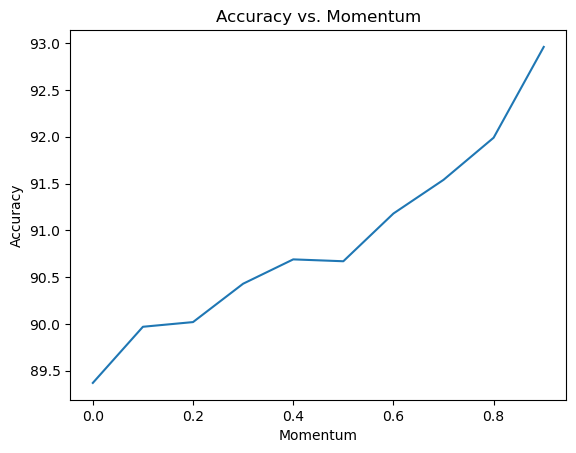

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

momentum_vals = np.linspace(0.0, 0.9, 10)
accuracies = []
for momentum in momentum_vals:
    mlp=Sequential()
    mlp.add(Dense(units=512,activation='tanh',input_shape=(784,)))
    mlp.add(Dense(units=10,activation='softmax'))
    sgd = SGD(learning_rate=0.01, momentum=momentum)
    mlp.compile(loss='MSE', optimizer=sgd, metrics=['accuracy'])
    mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=0)
    res=mlp.evaluate(x_test,y_test,verbose=0)
    accuracies.append(res[1]*100)
    print("Momentum =", momentum, ", Accuracy =", accuracies[-1])

plt.plot(momentum_vals, accuracies)
plt.xlabel("Momentum")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Momentum")
plt.show()


## 8번 
![](./1.png)